In [11]:
import scipy.io as sio
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
import sys
import h5py

In [12]:
#ninapro 데이터셋 불러오기
ninapro_df = pd.DataFrame()
for i in range (1,11):
    adress = f"ninapro_db5/s{i}/S{i}_E2_A1"
    filename = adress
    mat = sio.loadmat(filename)
    emg = mat['emg']
    Restimulus = mat['restimulus']
    rerepetition = mat['rerepetition']
    df_emg = pd.DataFrame(emg)
    df_Restimulus = pd.DataFrame(Restimulus)
#    df_rerepetition = pd.DataFrame(rerepetition)
    df = pd.concat([df_emg, df_Restimulus], axis=1)
#    df = pd.concat([df, df_rerepetition], axis=1)
#    df.columns = ['emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7', 'emg8', 'emg9', 'emg10', 'emg11', 'emg12', 'emg13', 'emg14', 'emg15', 'emg16', 'Restimulus', 'rerepetition']
    df.columns = ['emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7', 'emg8', 'emg9', 'emg10', 'emg11', 'emg12', 'emg13', 'emg14', 'emg15', 'emg16', 'Restimulus']
    ninapro_df5 = pd.concat([ninapro_df, df])

In [14]:
import pandas as pd
import scipy.io as sio
import numpy as np

dfs = []
for i in range(1, 21):
    address = f"ninapro_db2/DB2_s{i}/S{i}_E1_A1.mat"
    try:
        mat = sio.loadmat(address)
        
        emg = mat['emg'] 
        restimulus = mat['restimulus']
        
        n_samples, n_channels = emg.shape
        target_channels = 16
        
        if n_channels < target_channels:
            pad_width = target_channels - n_channels
            zeros = np.zeros((n_samples, pad_width))
            emg_padded = np.hstack([emg, zeros])
        else:
            emg_padded = emg[:, :target_channels]
            

        col_names = [f'emg{k}' for k in range(1, target_channels + 1)]
        df_emg = pd.DataFrame(emg_padded, columns=col_names)
        df_restimulus = pd.DataFrame(restimulus, columns=['Restimulus'])
        
        df_concat = pd.concat([df_emg, df_restimulus], axis=1)
        
        dfs.append(df_concat)
    
    except FileNotFoundError:
        print(f"파일을 찾을 수 없습니다: {address}")
    except Exception as e:
        print(f"Subject {i} 처리 중 에러 발생: {e}")

if dfs:
    ninapro_df2 = pd.concat(dfs, ignore_index=True)
    print("-" * 30)
    print("최종 병합 완료")
    print(f"전체 데이터 Shape: {ninapro_df2.shape}")
    print(f"컬럼 목록: {list(ninapro_df2.columns)}")
else:
    print("데이터가 로드되지 않았습니다.")

------------------------------
최종 병합 완료
전체 데이터 Shape: (36027660, 17)
컬럼 목록: ['emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7', 'emg8', 'emg9', 'emg10', 'emg11', 'emg12', 'emg13', 'emg14', 'emg15', 'emg16', 'Restimulus']


In [16]:
#nature df csv불러오는 코드
nature_df = pd.read_csv('nature_df.csv')
nature_df

,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg8,emg9,emg10,emg11,emg12,emg13,emg14,emg15,emg16,Restimulus
0,0.000038,0.000025,0.000008,0.000008,-0.000016,-0.000002,-0.000005,-0.000010,0.000017,0.000061,-0.000008,-0.000008,-0.000022,-0.000008,-0.000016,-0.000013,7
1,0.000020,0.000026,0.000010,0.000008,-0.000017,-0.000002,-0.000008,-0.000007,0.000014,0.000043,-0.000011,-0.000009,-0.000022,-0.000012,-0.000016,-0.000018,7
2,0.000009,0.000026,0.000011,0.000008,-0.000024,-0.000004,-0.000013,-0.000005,0.000014,0.000025,-0.000015,-0.000011,-0.000018,-0.000013,-0.000013,-0.000016,7
3,0.000012,0.000023,0.000009,0.000007,-0.000041,-0.000009,-0.000016,-0.000006,0.000012,0.000010,-0.000017,-0.000012,-0.000014,-0.000013,-0.000008,-0.000013,7
4,0.000021,0.000020,0.000006,0.000005,-0.000044,-0.000015,-0.000018,-0.000008,0.000007,0.000003,-0.000016,-0.000011,-0.000012,-0.000014,-0.000006,-0.000012,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47973915,0.000030,0.000042,0.000010,0.000012,-0.000030,-0.000011,-0.000027,-0.000002,-0.000092,-0.000030,-0.000013,-0.000016,-0.000010,-0.000008,-0.000013,-0.000011,18
47973916,0.000030,0.000060,0.000011,0.000013,-0.000030,-0.000009,-0.000026,-0.000013,-0.000086,-0.000012,-0.000010,-0.000015,-0.000009,-0.000008,-0.000014,-0.000011,18
47973917,0.000024,0.000074,0.000012,0.000014,-0.000029,-0.000006,-0.000025,-0.000014,-0.000072,0.000002,-0.000010,-0.000016,-0.000011,-0.000008,-0.000014,-0.000013,18
47973918,0.000015,0.000077,0.000013,0.000016,-0.000027,-0.000005,-0.000021,-0.000014,-0.000051,0.000002,-0.000012,-0.000017,-0.000013,-0.000006,-0.000013,-0.000014,18


In [ ]:
import numpy as np
import pandas as pd
from scipy import signal
from tqdm import tqdm
import gc

# ==========================================
# 0. 설정 파라미터
# ==========================================
TARGET_FREQ = 1000  # 목표 주파수
WINDOW_MS = 200     # 윈도우 크기 (ms)
STRIDE_MS = 50      # 이동 간격 (ms)

WINDOW_SIZE = int(WINDOW_MS * (TARGET_FREQ / 1000))
STRIDE = int(STRIDE_MS * (TARGET_FREQ / 1000))

print(f"설정: 1000Hz 변환, Window={WINDOW_SIZE}, Stride={STRIDE}")

# ==========================================
# 1. 리샘플링 함수 (이전과 동일)
# ==========================================
def upsample_200_to_1000(df):
    emg_cols = [c for c in df.columns if c.startswith('emg')]
    X = df[emg_cols].values
    y = df['Restimulus'].values
    
    new_len = len(df) * 5
    X_resampled = signal.resample(X, new_len)
    y_resampled = np.repeat(y, 5) # 라벨은 단순 반복
    
    df_new = pd.DataFrame(X_resampled, columns=emg_cols)
    df_new['Restimulus'] = y_resampled.astype(int)
    return df_new

def downsample_2000_to_1000(df):
    return df.iloc[::2].reset_index(drop=True)

# ==========================================
# 2. 데이터 전처리 실행
# ==========================================
print("\n--- 1. 주파수 변환 (Resampling) ---")

# DB5 (200Hz -> 1000Hz)
# ninapro_df5 = ... (로드되어 있다고 가정)
df5_resampled = upsample_200_to_1000(ninapro_df5)
print(f"DB5 변환 완료: {df5_resampled.shape}")

# DB2 (2000Hz -> 1000Hz)
# ninapro_df2 = ... (로드되어 있다고 가정)
df2_resampled = downsample_2000_to_1000(ninapro_df2)
print(f"DB2 변환 완료: {df2_resampled.shape}")

# Nature (2000Hz -> 1000Hz)
# nature_df = ... (로드되어 있다고 가정)
df_nature_resampled = downsample_2000_to_1000(nature_df)
print(f"Nature 변환 완료: {df_nature_resampled.shape}")

# ==========================================
# 3. Sliding Window 및 Class 0 필터링
# ==========================================
def create_segments_and_filter(df, window_size, stride, remove_zero=True):
    """
    Sliding Window 후 Class 0을 제거하여 반환
    """
    emg_cols = [c for c in df.columns if c.startswith('emg')]
    X_data = df[emg_cols].values
    y_data = df['Restimulus'].values
    
    X_list = []
    y_list = []
    
    # 1. 윈도우 자르기
    for i in tqdm(range(0, len(df) - window_size, stride), desc="Windowing"):
        window_X = X_data[i : i + window_size, :]
        # 윈도우 내 최빈값(가장 많이 등장한 값)을 라벨로 선정
        window_y = np.bincount(y_data[i : i + window_size].astype(int)).argmax()
        
        X_list.append(window_X)
        y_list.append(window_y)
        
    X_arr = np.array(X_list, dtype=np.float32)
    y_arr = np.array(y_list, dtype=int)
    
    # 2. Class 0 제거 (핵심 추가 기능)
    if remove_zero:
        # y가 0이 아닌 인덱스만 찾음
        valid_idx = np.where(y_arr != 0)[0]
        
        # 필터링 적용
        X_arr = X_arr[valid_idx]
        y_arr = y_arr[valid_idx]
        
        print(f" -> Class 0 제거 전: {len(X_list)}개, 제거 후: {len(X_arr)}개")
        
    return X_arr, y_arr

print("\n--- 2. Sliding Window & Filtering ---")

print("1) Processing DB5...")
X_db5, y_db5 = create_segments_and_filter(df5_resampled, WINDOW_SIZE, STRIDE, remove_zero=True)

print("2) Processing DB2...")
X_db2, y_db2 = create_segments_and_filter(df2_resampled, WINDOW_SIZE, STRIDE, remove_zero=True)

print("3) Processing Nature...")
X_nature, y_nature = create_segments_and_filter(df_nature_resampled, WINDOW_SIZE, STRIDE, remove_zero=True)

# ==========================================
# 4. 최종 병합
# ==========================================
print("\n--- 3. 최종 병합 (Merging) ---")

X_final = np.concatenate([X_db5, X_db2, X_nature], axis=0)
y_final = np.concatenate([y_db5, y_db2, y_nature], axis=0)

# 메모리 정리
#del df5_resampled, df2_resampled, df_nature_resampled
del X_db5, X_db2, X_nature
gc.collect()

print("-" * 40)
print(f"최종 X Shape: {X_final.shape}")
print(f"최종 y Shape: {y_final.shape}")
print("라벨 구성 확인 (0이 없어야 함):", np.unique(y_final))
print("-" * 40)

설정: 1000Hz 변환, Window=200, Stride=50

--- 1. 주파수 변환 (Resampling) ---
DB5 변환 완료: (1070310, 17)
DB2 변환 완료: (18013830, 17)
Nature 변환 완료: (23986960, 17)

--- 2. Sliding Window & Filtering ---
1) Processing DB5...


Windowing: 100%|██████████| 21403/21403 [00:00<00:00, 768019.17it/s]

 -> Class 0 제거 전: 21403개, 제거 후: 7566개
2) Processing DB2...



Windowing: 100%|██████████| 360273/360273 [00:00<00:00, 753797.30it/s]


 -> Class 0 제거 전: 360273개, 제거 후: 185302개
3) Processing Nature...


Windowing: 100%|██████████| 479736/479736 [00:00<00:00, 841015.33it/s]


 -> Class 0 제거 전: 479736개, 제거 후: 399763개

--- 3. 최종 병합 (Merging) ---
----------------------------------------
최종 X Shape: (592631, 200, 16)
최종 y Shape: (592631,)
라벨 구성 확인 (0이 없어야 함): [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
----------------------------------------


Drawing DB5 Comparison...


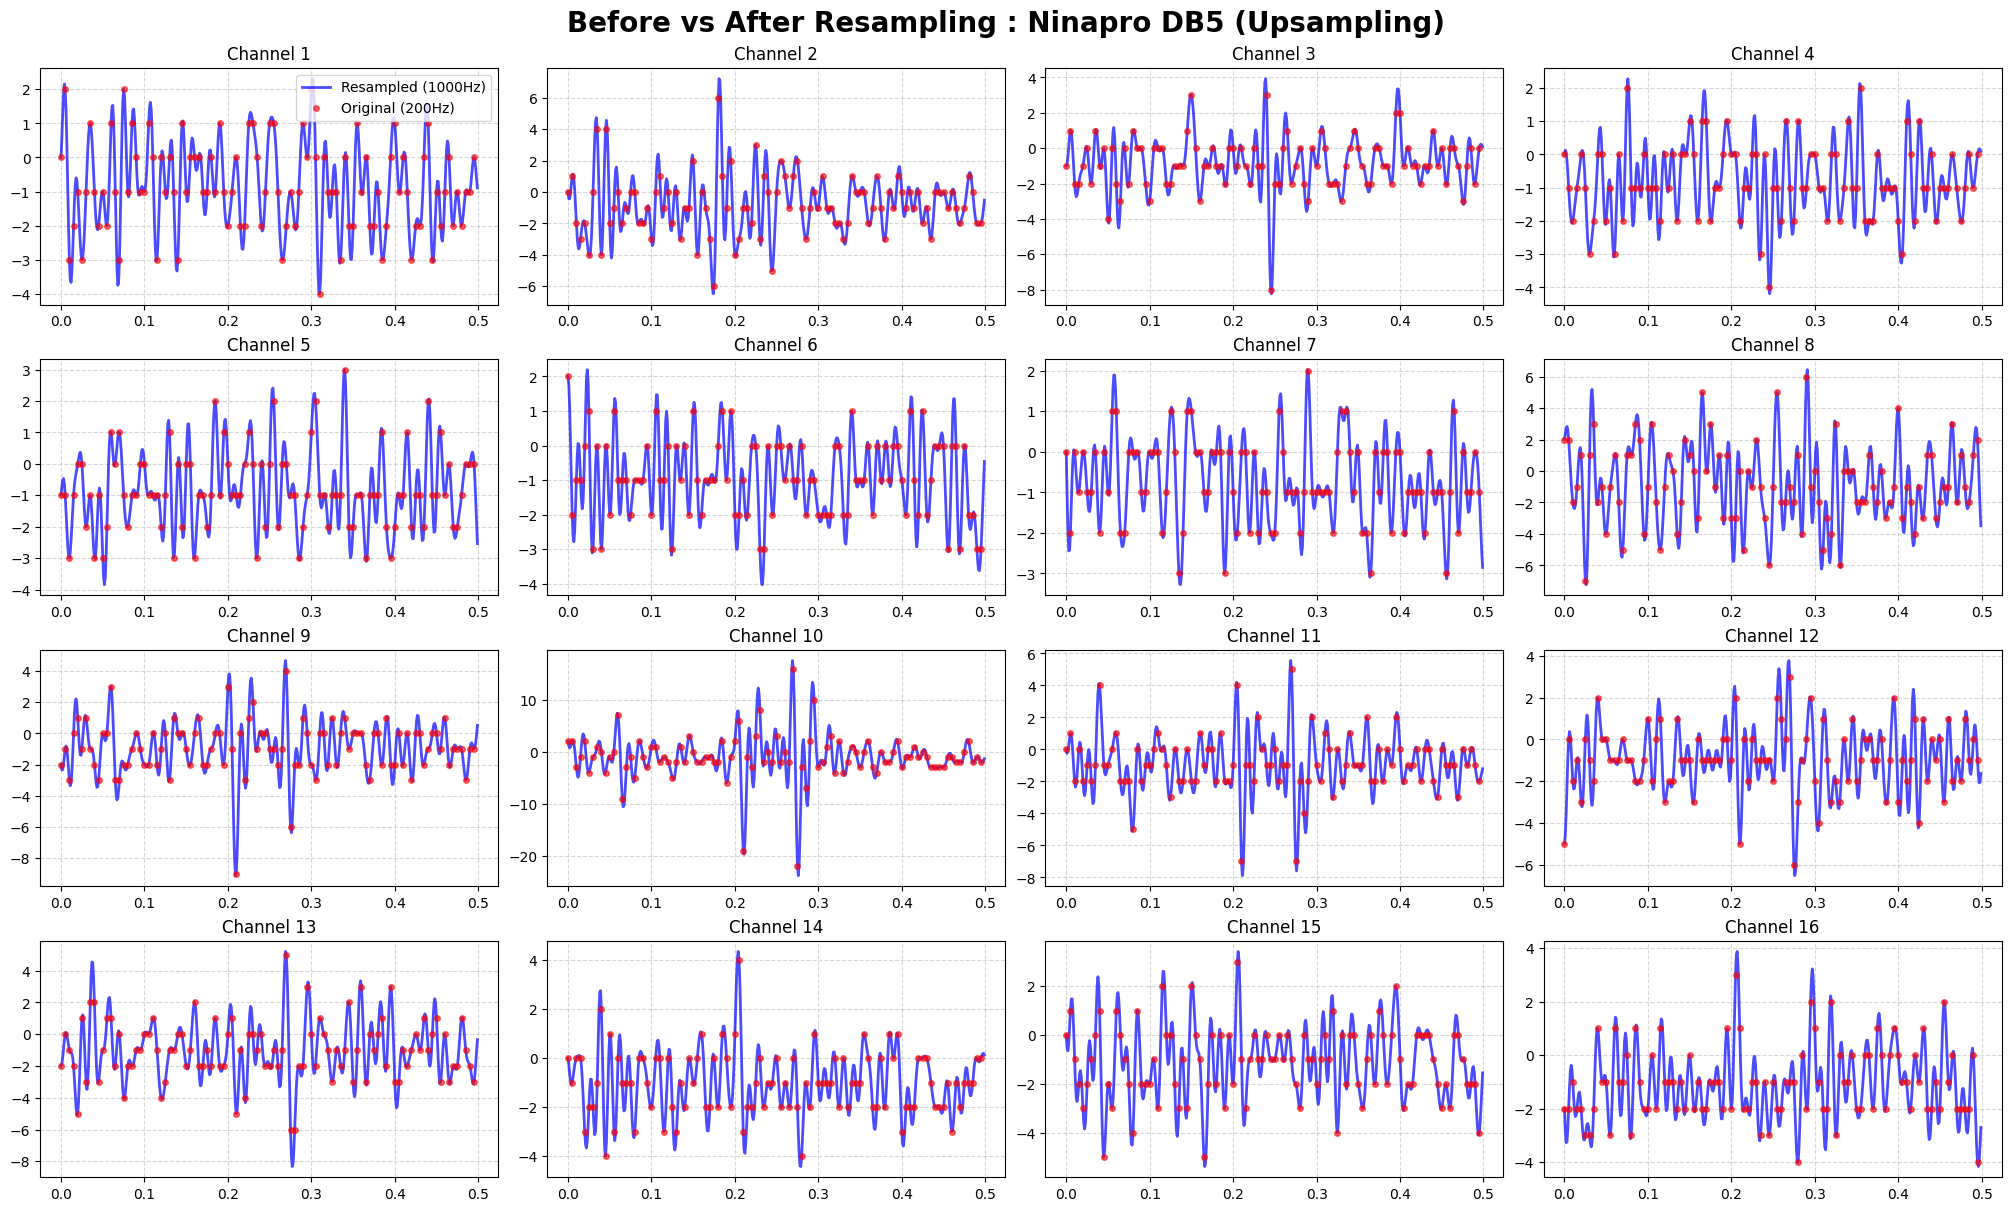

Drawing DB2 Comparison...


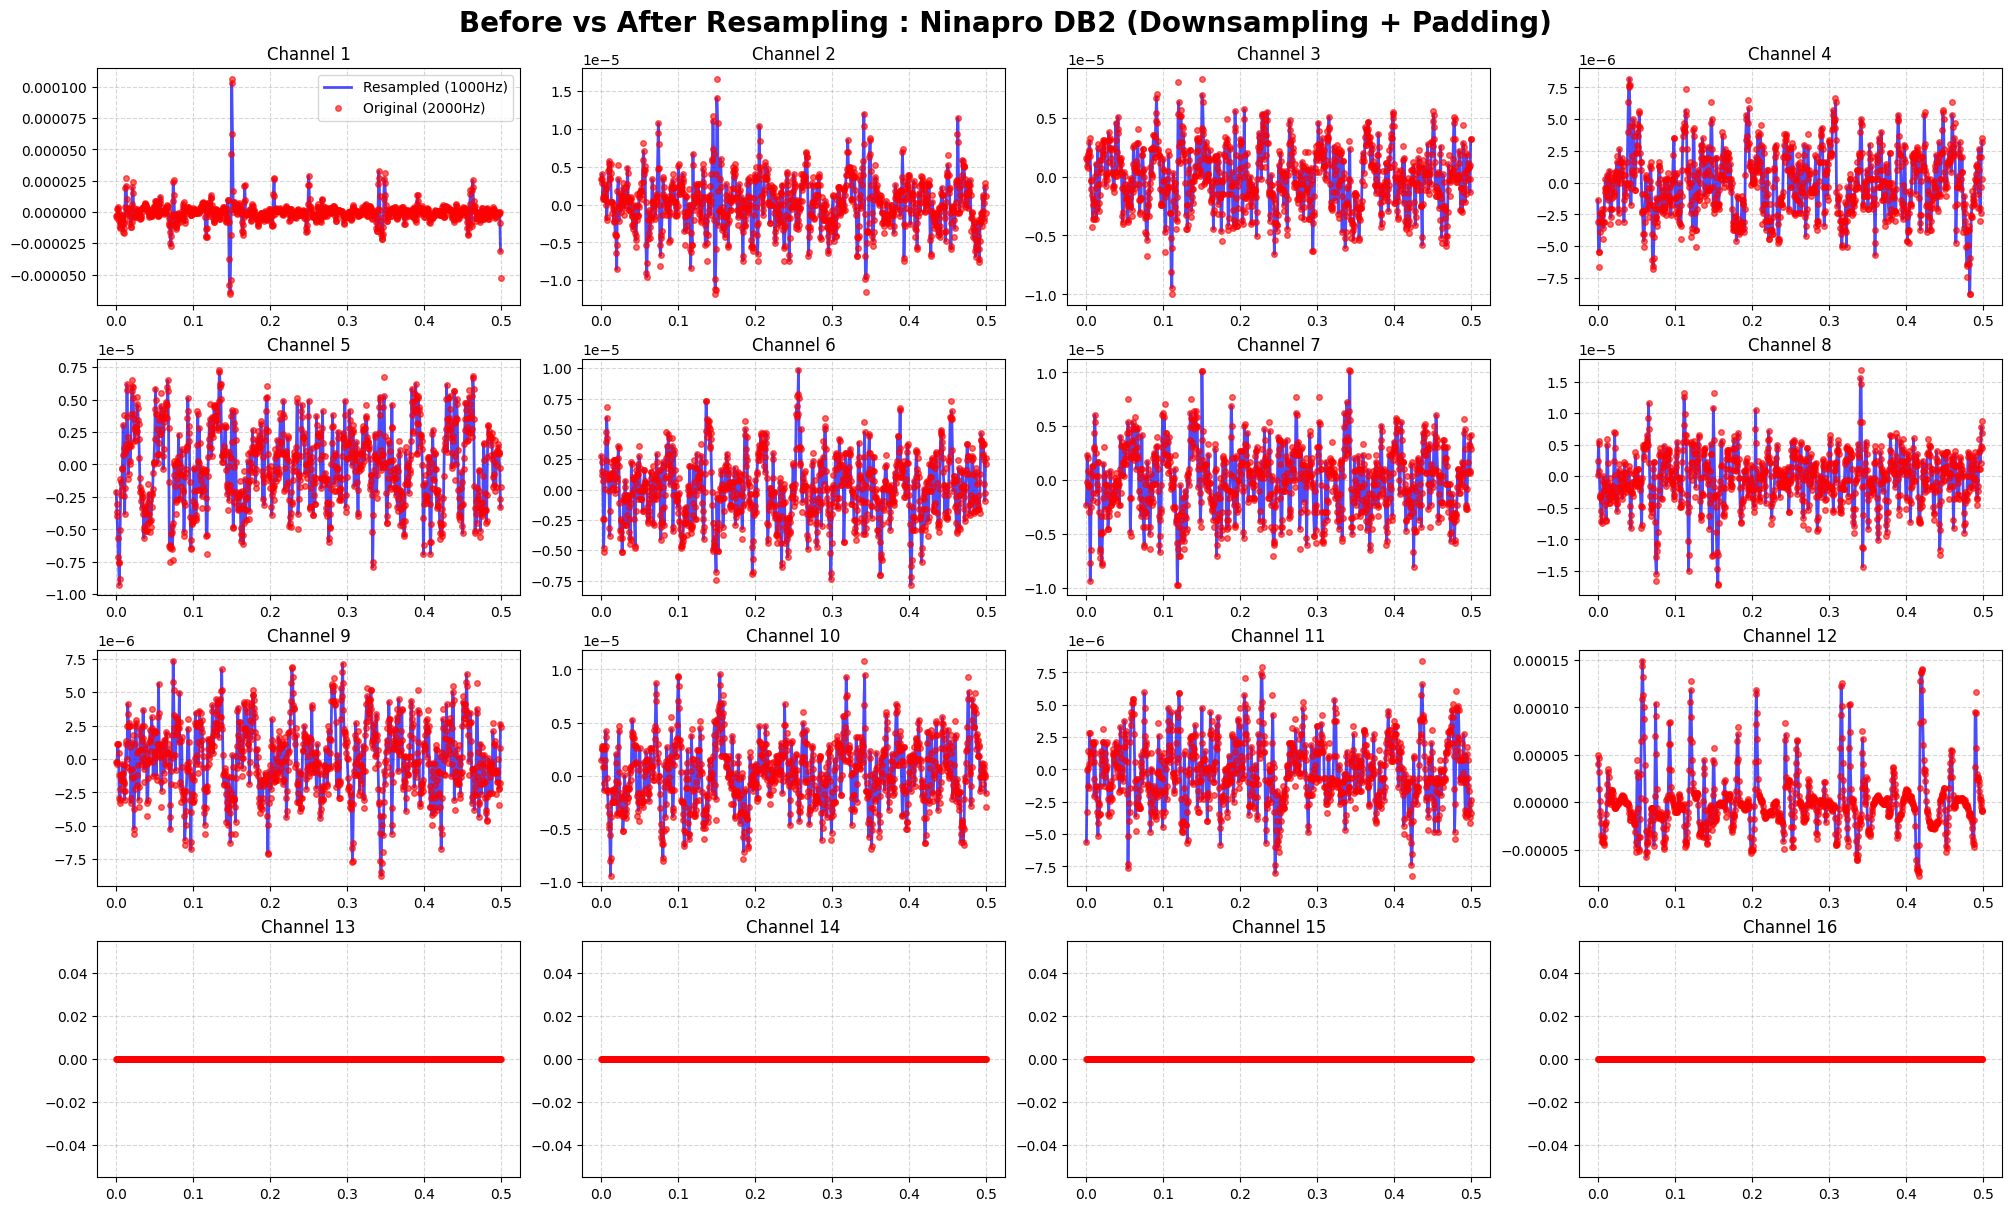

Drawing Nature Comparison...


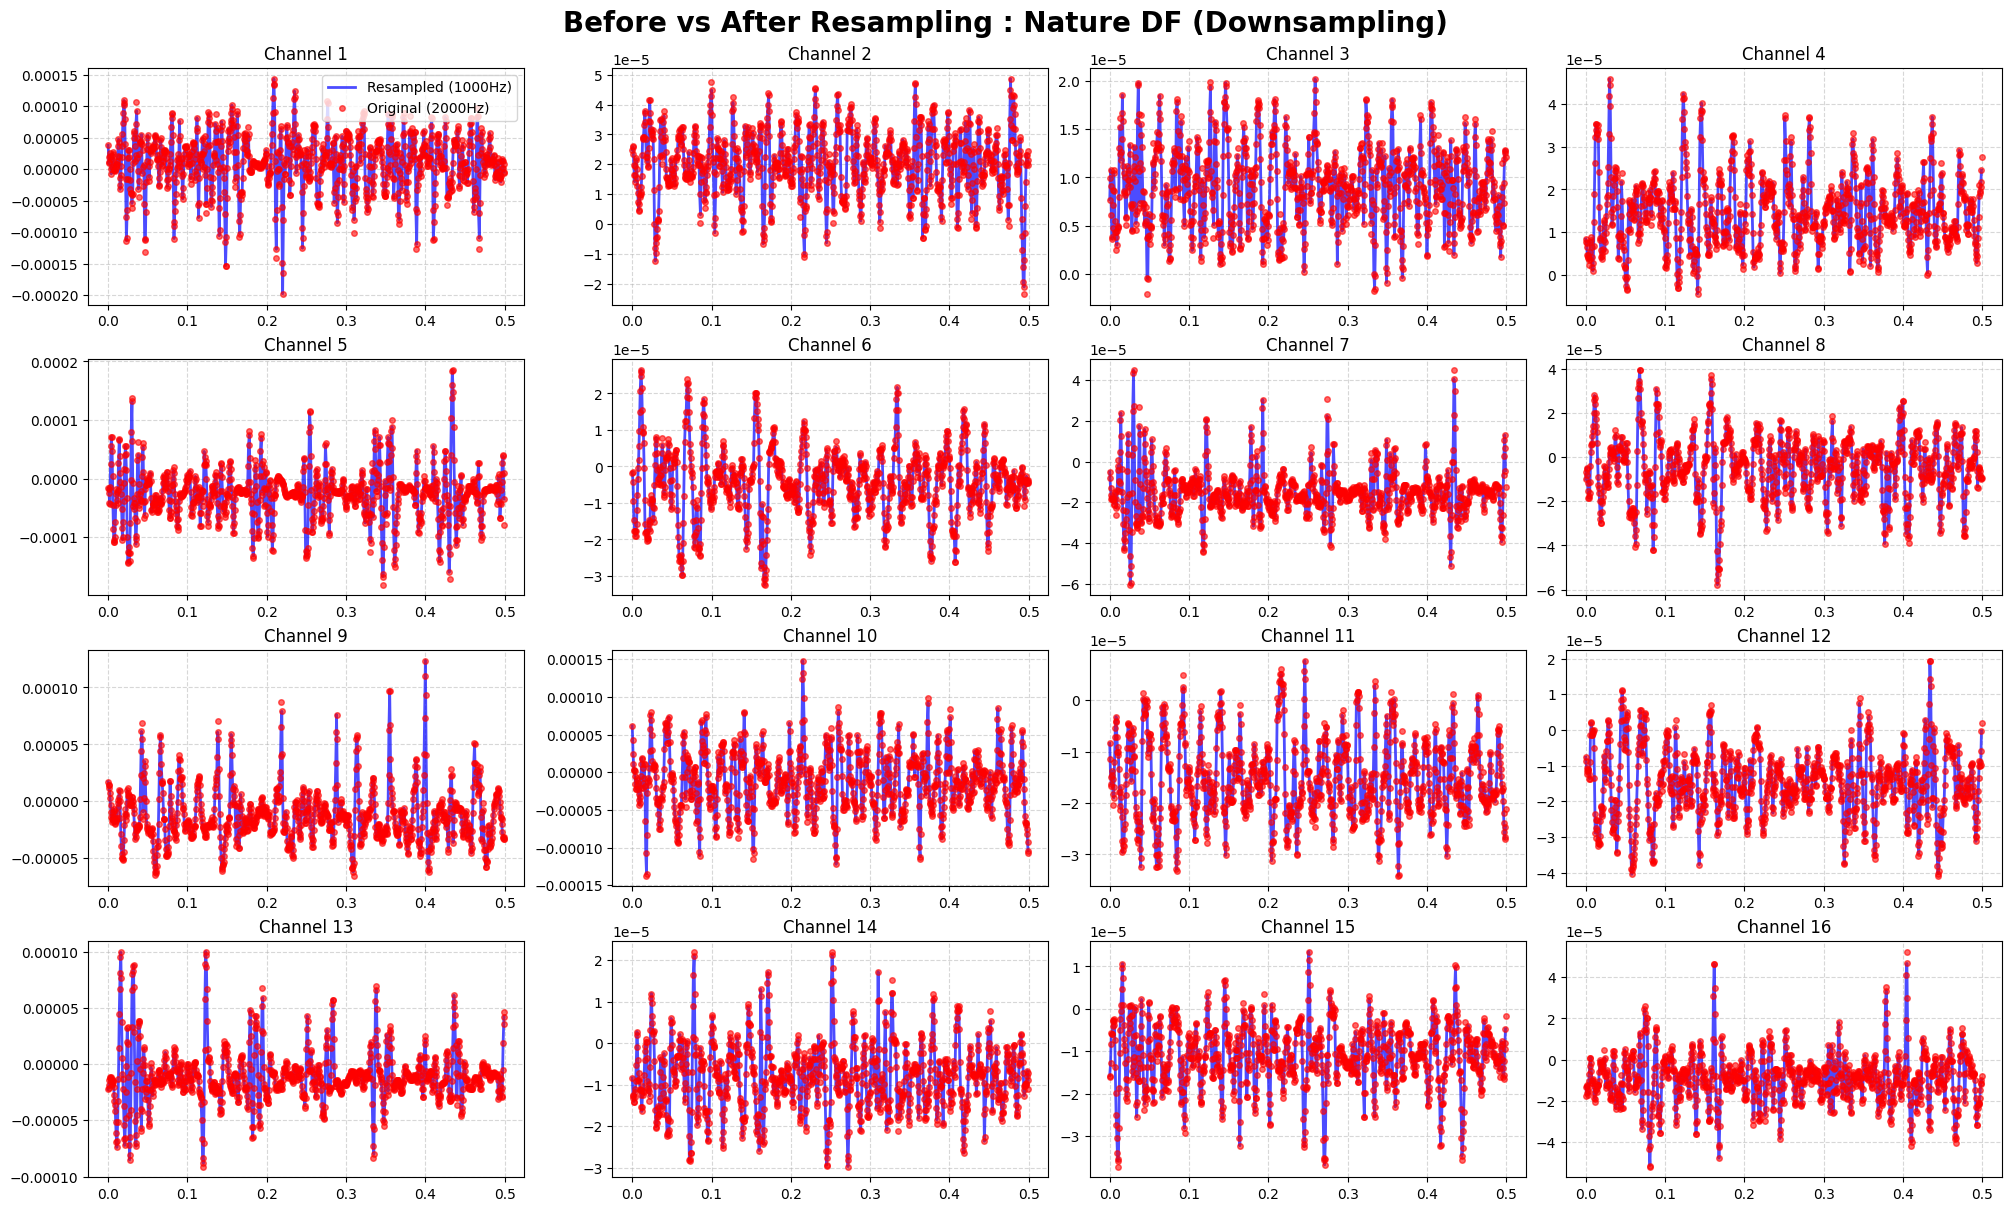

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def compare_signals_16ch(df_origin, df_resampled, original_freq, target_freq=1000, duration_sec=0.5, title=""):
    """
    16개 채널에 대해 원본(Original)과 변환 후(Resampled) 신호를 겹쳐서 시각화
    """
    # 1. 시각화할 샘플 개수 계산
    n_samples_origin = int(duration_sec * original_freq)
    n_samples_target = int(duration_sec * target_freq)
    
    # 2. 데이터 슬라이싱 (초반 0.5초만)
    # 원본 데이터 채널명 확인 (emg1 ~ emg16이 아닐 경우를 대비해 iloc 사용)
    # 보통 원본 데이터프레임에 emg 컬럼이 앞쪽에 있다고 가정
    emg_cols = [c for c in df_resampled.columns if c.startswith('emg')]
    
    # 원본 데이터 슬라이싱
    # 원본 DF가 16채널이 안될 경우(padding 전)를 대비해 안전하게 처리
    subset_origin = df_origin.iloc[:n_samples_origin]
    subset_target = df_resampled.iloc[:n_samples_target]
    
    # 시간축 생성 (X축을 시간으로 통일)
    time_origin = np.arange(n_samples_origin) / original_freq
    time_target = np.arange(n_samples_target) / target_freq
    
    # 3. 플롯 생성 (4x4 Grid)
    fig, axes = plt.subplots(4, 4, figsize=(20, 12), constrained_layout=True)
    fig.suptitle(f"Before vs After Resampling : {title}", fontsize=20, fontweight='bold')
    
    axes = axes.flatten()
    
    for i in range(16):
        col_name = f'emg{i+1}'
        ax = axes[i]
        
        # --- 변환 후 데이터 (Target: 1000Hz) ---
        # 파란색 실선으로 부드럽게 표현
        if col_name in subset_target.columns:
            ax.plot(time_target, subset_target[col_name], label=f'Resampled ({target_freq}Hz)', 
                    color='blue', alpha=0.7, linewidth=2)
        
        # --- 원본 데이터 (Original) ---
        # 빨간색 점으로 원래 데이터 위치 표시
        # DB2 같이 Padding된 경우 원본에 컬럼이 없을 수 있음 -> 0으로 표시하거나 스킵
        if i < len(subset_origin.columns) and subset_origin.columns[i].startswith('emg'):
            # 컬럼 이름이 매칭되지 않을 수 있으니 iloc로 i번째 컬럼 가져오기 (주의 필요)
            # 가장 안전한 방법: col_name이 있으면 쓰고, 없으면 i번째 컬럼 사용
            if col_name in subset_origin.columns:
                origin_data = subset_origin[col_name]
            else:
                # 원본 컬럼이 모자란 경우 (예: 12채널)
                try:
                    origin_data = subset_origin.iloc[:, i]
                except IndexError:
                    origin_data = np.zeros(n_samples_origin)

            ax.plot(time_origin, origin_data, label=f'Original ({original_freq}Hz)', 
                    color='red', marker='o', markersize=4, linestyle='None', alpha=0.6)
        
        ax.set_title(f"Channel {i+1}")
        ax.grid(True, linestyle='--', alpha=0.5)
        
        # 첫 번째 그래프에만 범례 표시
        if i == 0:
            ax.legend(loc='upper right')

    plt.show()

# ==========================================
# 실행 코드 (3가지 데이터셋 확인)
# ==========================================

# 1. Ninapro DB5 (200Hz -> 1000Hz Upsampling)
# 빨간 점 사이를 파란 선이 부드럽게 이어주는지 확인하세요.
print("Drawing DB5 Comparison...")
compare_signals_16ch(ninapro_df5, df5_resampled, 
                     original_freq=200, target_freq=1000, 
                     title="Ninapro DB5 (Upsampling)")

# 2. Ninapro DB2 (2000Hz -> 1000Hz Downsampling)
# 빨간 점들이 파란 선보다 더 촘촘하게 찍혀있는지 확인하세요. (데이터 1/2 감소)
# 채널 13~16은 원본 데이터가 없어서 빨간 점이 엉뚱하게 찍히거나 없을 수 있습니다 (Zero padding 확인용).
print("Drawing DB2 Comparison...")
compare_signals_16ch(ninapro_df2, df2_resampled, 
                     original_freq=2000, target_freq=1000, 
                     title="Ninapro DB2 (Downsampling + Padding)")

# 3. Nature (2000Hz -> 1000Hz Downsampling)
print("Drawing Nature Comparison...")
compare_signals_16ch(nature_df, df_nature_resampled, 
                     original_freq=2000, target_freq=1000, 
                     title="Nature DF (Downsampling)")
del df5_resampled, df2_resampled, df_nature_resampled

In [26]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, Activation, Reshape, Permute, Multiply, GlobalAveragePooling1D, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


save_dir = './processed_data'

# 1. 데이터 로드
X = np.load(os.path.join(save_dir, 'X_combined.npy')) # (Samples, 200, 16)
y = np.load(os.path.join(save_dir, 'y_combined.npy'))

print(f"정규화 전 X 평균: {np.mean(X):.4f}, 표준편차: {np.std(X):.4f}")

# 2. 정규화 (Standard Scaling)
# 3차원(Samples, Time, Channels) -> 2차원(Samples*Time, Channels)로 펴서 계산해야 함
N, T, C = X.shape
X_reshaped = X.reshape(N * T, C)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)

# 다시 3차원으로 복구
X = X_scaled.reshape(N, T, C)

print(f"정규화 후 X 평균: {np.mean(X):.4f}, 표준편차: {np.std(X):.4f}")
print("-> 이제 모든 데이터가 평균 0, 표준편차 1 근처로 맞춰졌습니다.")

# 1) 라벨 One-Hot Encoding
unique_labels = np.unique(y)
num_classes = len(unique_labels)
print(f"클래스 개수: {num_classes} (라벨 목록: {unique_labels})")

# 라벨을 0부터 시작하는 인덱스로 매핑 (혹시 모를 오류 방지)
label_map = {label: idx for idx, label in enumerate(unique_labels)}
y_mapped = np.array([label_map[label] for label in y])

y_onehot = to_categorical(y_mapped, num_classes=num_classes)

# 2) 학습/검증/테스트 분리 (6:2:2)
X_train, X_temp, y_train, y_temp = train_test_split(X, y_onehot, test_size=0.4, random_state=42, stratify=y_onehot)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

def channel_attention(input_feature, ratio=8):

    channel_axis = -1
    filters = input_feature.shape[channel_axis]
    
    # Squeeze
    se = GlobalAveragePooling1D()(input_feature)
    
    # Excitation
    se = Dense(filters // ratio, activation='relu', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', use_bias=False)(se)
    
    # Rescale
    # (Batch, 1, Filters)로 변환하여 곱셈
    se = Reshape((1, filters))(se)
    return Multiply()([input_feature, se])

def build_model(input_shape, num_classes):
    inputs = Input(shape=input_shape) # (200, 16)
    

    x = Reshape((input_shape[0], input_shape[1], 1))(inputs) # (200, 16, 1)
    
    # Block 1
    x = Conv2D(32, kernel_size=(5, 1), padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)
    
    # Block 2
    x = Conv2D(64, kernel_size=(5, 1), padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)
    x = Dropout(0.3)(x)

    # (Time, Channel, Filters) -> (Time, Channel * Filters)
    # 즉, 1D CNN 형태로 변환하여 채널간의 상호작용 학습 시작
    x = Reshape((input_shape[0], -1))(x) 
    
    # --- [Step 2] Temporal Mixing & Attention ---
    
    # 1D Conv로 통합 정보 추출
    x = tf.keras.layers.Conv1D(128, kernel_size=3, padding='same', activation='elu')(x)
    x = BatchNormalization()(x)
    
    # ** Attention Mechanism **
    # 중요한 시간대(Time step)에 가중치 부여 (Temporal Attention 효과)
    attn = channel_attention(x)
    x = tf.keras.layers.Add()([x, attn]) # Skip connection 처럼 더해줌
    
    # --- [Step 3] Classification Head ---
    x = GlobalAveragePooling1D()(x) # 전체 시간 평균 (Flatten보다 파라미터 적고 과적합 강함)
    
    x = Dense(128, activation='elu')(x)
    x = Dropout(0.4)(x)
    
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# 모델 생성
input_shape = (X_train.shape[1], X_train.shape[2]) # (200, 16)
model = build_model(input_shape, num_classes)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 콜백 설정
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,            # 필요에 따라 조절
    batch_size=32,         # 메모리에 따라 조절
    callbacks=[checkpoint, early_stopping, reduce_lr],
    verbose=1
)


def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_history(history)

# 최종 테스트 셋 평가
print("\n[최종 테스트 평가]")
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

정규화 전 X 평균: -0.0121, 표준편차: 1.5197
정규화 후 X 평균: -0.0000, 표준편차: 0.9999
-> 이제 모든 데이터가 평균 0, 표준편차 1 근처로 맞춰졌습니다.
클래스 개수: 19 (라벨 목록: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19])
Train: (355578, 200, 16), Val: (118526, 200, 16), Test: (118527, 200, 16)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 200, 16)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_8 (Reshape) │ (None, 200, 16,   │          0 │ input_layer_4[0]… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 200, 16,   │        192 │ reshape_8[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 16,   │        128 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 200, 16,   │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 200, 16,   │     10,304 │ activation_4[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 16,   │        256 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 200, 16,   │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 200, 16,   │          0 │ activation_5[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_9 (Reshape) │ (None, 200, 1024) │          0 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 200, 128)  │    393,344 │ reshape_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 128)  │        512 │ conv1d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 16)        │      2,048 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 128)       │      2,048 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_10          │ (None, 1, 128)    │          0 │ dense_21[0][0]    │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_6          │ (None, 200, 128)  │          0 │ batch_normalizat… │
│ (Multiply)          │                   │            │ reshape_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 200, 128)  │          0 │ batch_normalizat… │
│                     │                   │            │ multiply_6[0][0]

 Total params: 427,795 (1.63 MB)

 Trainable params: 427,347 (1.63 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
11112/11112 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.1569 - loss: 2.2610
Epoch 1: val_accuracy improved from None to 0.16380, saving model to best_model.h5


11112/11112 ━━━━━━━━━━━━━━━━━━━━ 1100s 99ms/step - accuracy: 0.1591 - loss: 2.1968 - val_accuracy: 0.1638 - val_loss: 2.6501 - learning_rate: 0.0010
Epoch 2/100
11112/11112 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.1859 - loss: 2.1205
Epoch 2: val_accuracy did not improve from 0.16380
11112/11112 ━━━━━━━━━━━━━━━━━━━━ 1099s 99ms/step - accuracy: 0.2538 - loss: 2.0099 - val_accuracy: 0.1549 - val_loss: 5.4477 - learning_rate: 0.0010
Epoch 3/100
11112/11112 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.4173 - loss: 1.7025
Epoch 3: val_accuracy did not improve from 0.16380
11112/11112 ━━━━━━━━━━━━━━━━━━━━ 1100s 99ms/step - accuracy: 0.4397 - loss: 1.6493 - val_accuracy: 0.0256 - val_loss: 5.2901 - learning_rate: 0.0010
Epoch 4/100
 1091/11112 ━━━━━━━━━━━━━━━━━━━━ 16:02 96ms/step - accuracy: 0.4841 - loss: 1.5390

KeyboardInterrupt: 